In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = pd.concat([train, test], axis = 0)
print(train.shape, test.shape, total.shape)
total

(1095, 81) (365, 81) (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1431          60       RL         60.0    21930   Pave   NaN      IR3   
1     757          60       RL         68.0    10769   Pave   NaN      IR1   
2     632         120       RL         34.0     4590   Pave   NaN      Reg   
3    1193          50       RM         60.0     9600   Pave  Grvl      Reg   
4     773          80       RL         94.0     7819   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
360  1327          30       RH         70.0     4270   Pave   NaN      Reg   
361  1154          30       RM          NaN     5890   Pave   NaN      Reg   
362   665          20       RL         49.0    20896   Pave   NaN      IR2   
363  1259          80       RL         59.0     9587   Pave   NaN      IR1   
364  1122          20       RL         84.0    10084   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3           Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
4           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
..          ...       ...  ...      ...    ...    ...         ...     ...   
360         Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
361         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
362         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
363         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
364         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        7   2006        WD         Normal     192140  
1        4   2009        WD         Normal     212000  
2        8   2007        WD         Normal     209500  
3        7   2007        WD         Normal     125000  
4        3   2010        WD        Abnorml     107000  
..     ...    ...       ...            ...        ...  
360      5   2007        WD         Normal      79000  
361      6   2008        WD         Normal     120500  
362      1   2006       New        Partial     423000  
363      7   2008        WD         Normal     190000  
364      7   2006       New        Partial     212900  

[1460 rows x 81 columns]

# Data cleaning

## - 工具
1. [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
2. [pandas.DataFrame.any() and pandas.DataFrame.all()](https://stackoverflow.com/questions/27791651/pandas-boolean-any-all)
3. [pandas.DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)


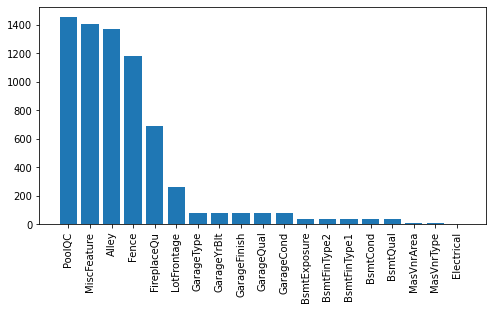

In [6]:
# 觀察缺失值狀況
# 有許多特徵的缺失值數量已經超過了資料總數的一半，但缺失值有時候其意義不單單只是缺失，也代表某些意義
missing = total.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending = False)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

In [21]:
discrete = total.columns[total.dtypes == 'object']
for item, val in zip(missing.index, missing.values):
    if item in discrete:
        print(f'{item:12} is  discrete.', end = ' ')
    else:
        print(f'{item:12} is continual.', end = ' ')
    print(f'Missing {val / total.shape[0] :.4%}')
# missing

PoolQC       is  discrete. Missing 99.5205%
MiscFeature  is  discrete. Missing 96.3014%
Alley        is  discrete. Missing 93.7671%
Fence        is  discrete. Missing 80.7534%
FireplaceQu  is  discrete. Missing 47.2603%
LotFrontage  is continual. Missing 17.7397%
GarageType   is  discrete. Missing 5.5479%
GarageYrBlt  is continual. Missing 5.5479%
GarageFinish is  discrete. Missing 5.5479%
GarageQual   is  discrete. Missing 5.5479%
GarageCond   is  discrete. Missing 5.5479%
BsmtExposure is  discrete. Missing 2.6027%
BsmtFinType2 is  discrete. Missing 2.6027%
BsmtFinType1 is  discrete. Missing 2.5342%
BsmtCond     is  discrete. Missing 2.5342%
BsmtQual     is  discrete. Missing 2.5342%
MasVnrArea   is continual. Missing 0.5479%
MasVnrType   is  discrete. Missing 0.5479%
Electrical   is  discrete. Missing 0.0685%


In [5]:
missing[0]

1

# Missing value
## 1. PoolQC

In [6]:
def plot_xy(x1, y1, x2, y2):
    plt.figure(figsize = (16, 6), dpi = 70)
    plt.subplot(1, 2, 1, title = 'Train')
    plt.scatter(x1, y1)

    plt.subplot(1, 2, 2, title = 'Test')
    plt.scatter(x2, y2)

    plt.show()

def nan_analysis(feature, target = 'SalePrice', na = 'Na'):
    x1 = train[feature].fillna(na)
    y1 = train[target]
    x2 = test[feature].fillna(na)
    y2 = test[target]
    plot_xy(x1, y1, x2, y2)

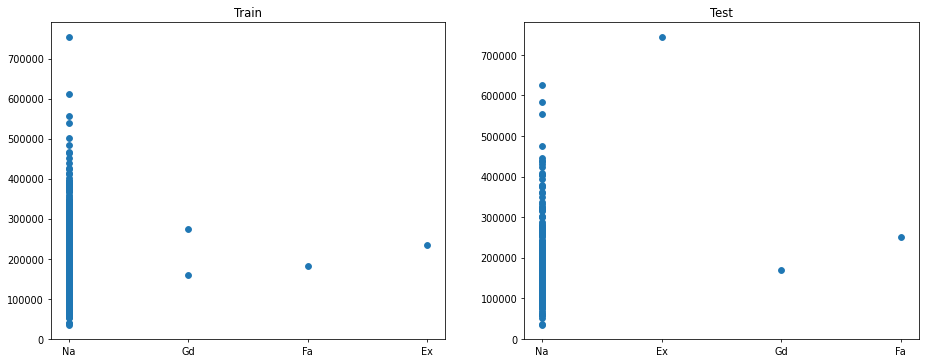

In [7]:
analysis_feature = 'PoolQC'
nan_analysis(analysis_feature)

In [8]:
total.drop(columns = [analysis_feature], inplace = True)

## 2. MiscFeature

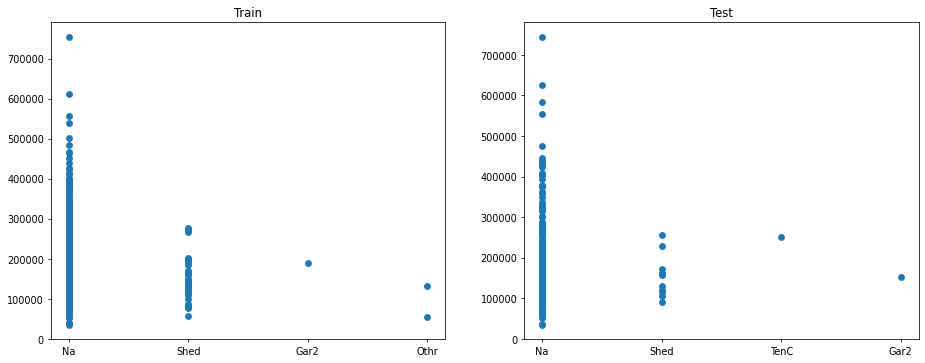

In [9]:
analysis_feature = 'MiscFeature'
nan_analysis(analysis_feature)

In [10]:
total[analysis_feature] = total[analysis_feature].fillna('Na')

## 3. Alley

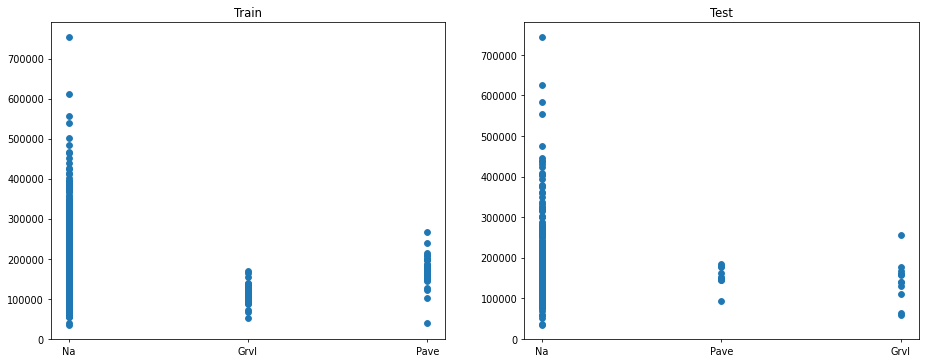

In [11]:
analysis_feature = 'Alley'
nan_analysis(analysis_feature)

In [12]:
total[analysis_feature] = total[analysis_feature].fillna('Na')

## 4. Fence

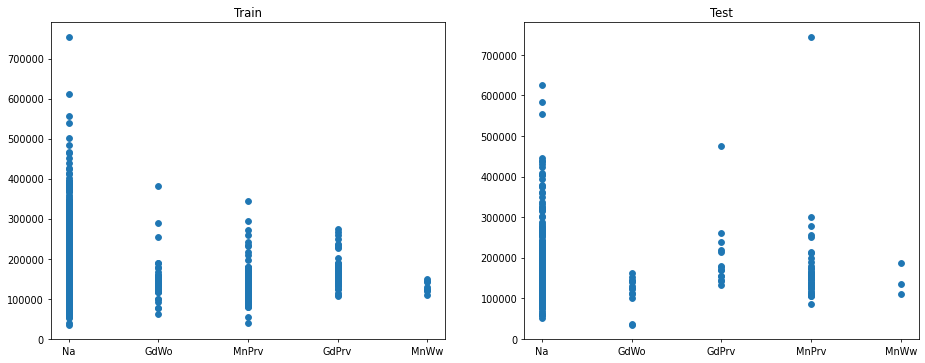

In [13]:
analysis_feature = 'Fence'
nan_analysis(analysis_feature)

In [14]:
total.drop(columns = [analysis_feature], inplace = True)

## 5. FireplaceQu

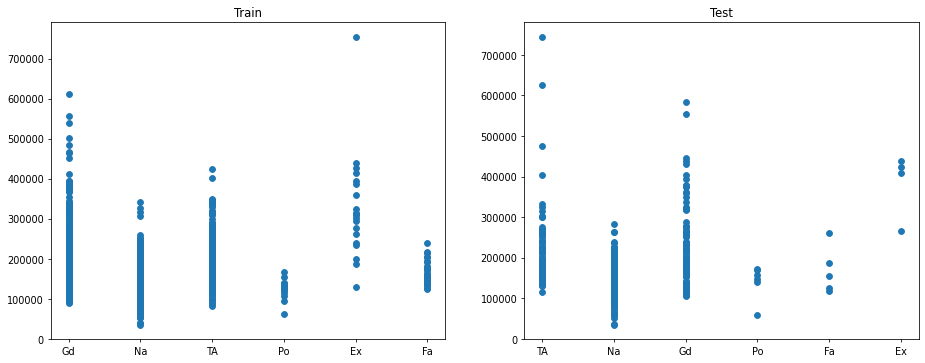

In [15]:
analysis_feature = 'FireplaceQu'
nan_analysis(analysis_feature, na = 'Na')

In [16]:
total[analysis_feature] = total[analysis_feature].fillna('Na')

## 6. LotFrontage

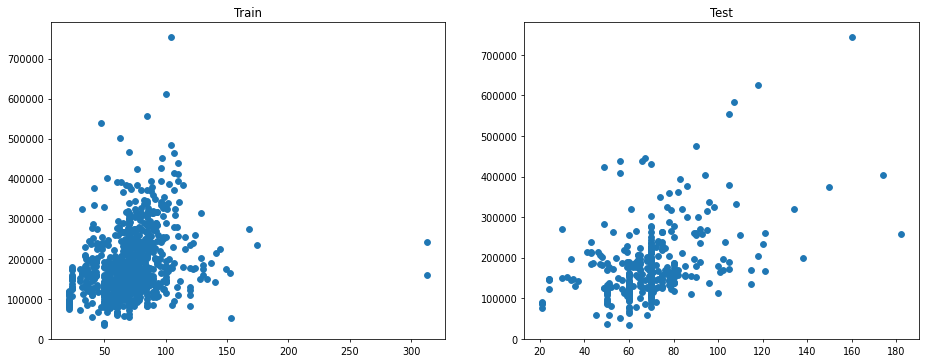

In [17]:
analysis_feature = 'LotFrontage'
nan_analysis(analysis_feature, na = train[analysis_feature].mean())

In [18]:
total[analysis_feature] = total[analysis_feature].fillna(train[analysis_feature].mean())

## 7. The others

GarageYrBlt


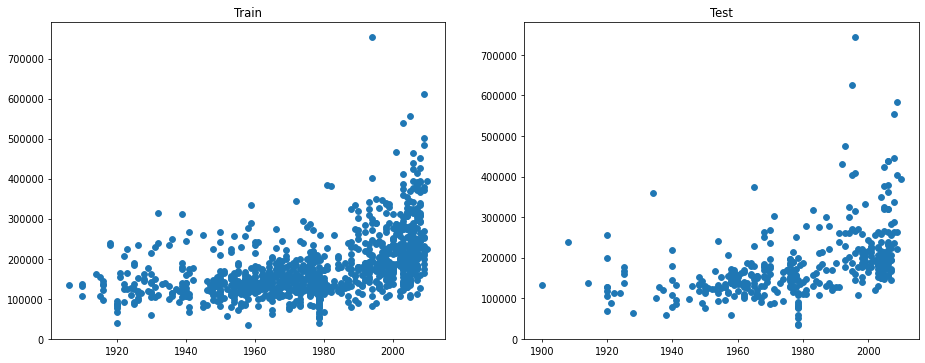

GarageType


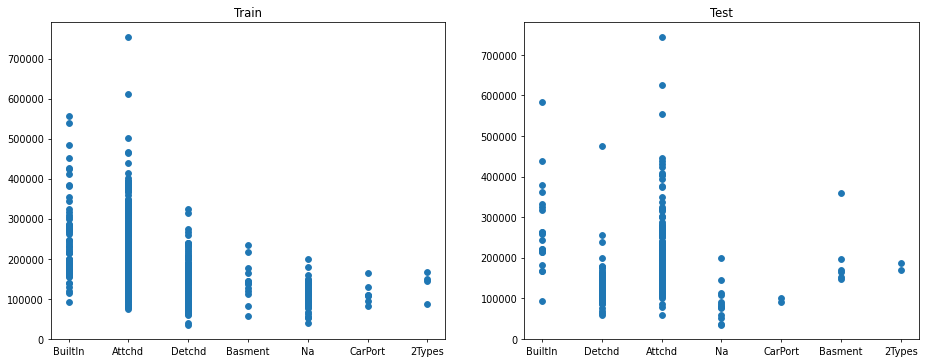

GarageFinish


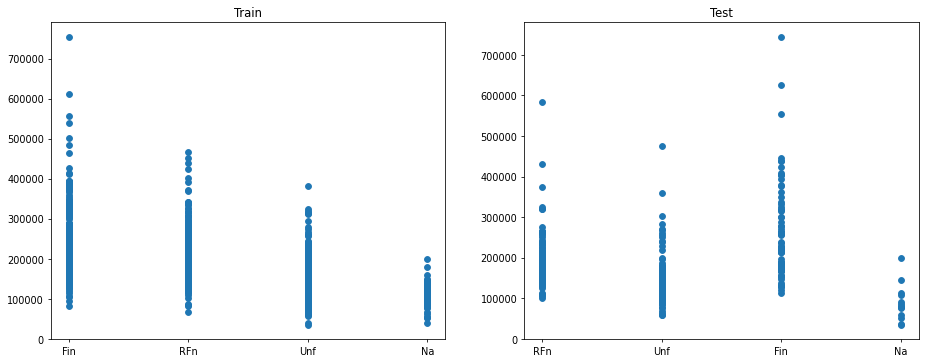

GarageQual


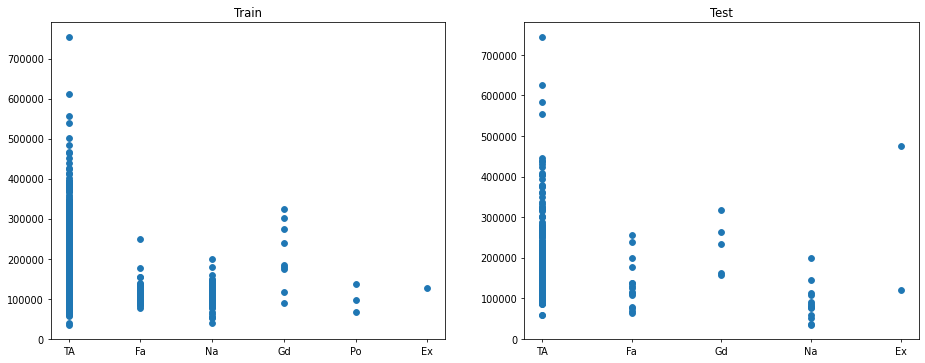

GarageCond


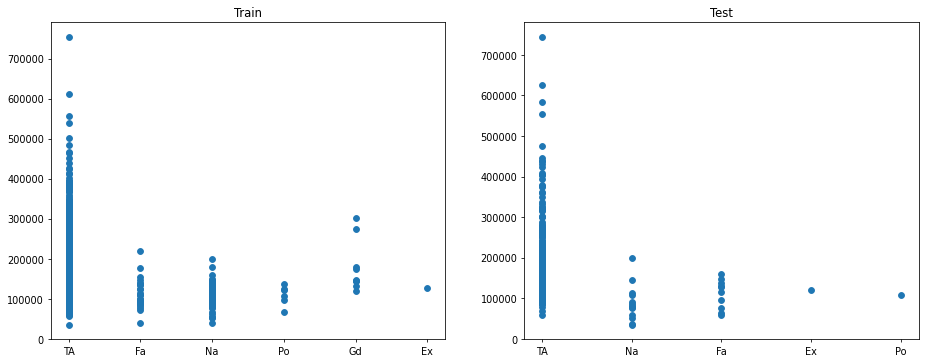

BsmtFinType2


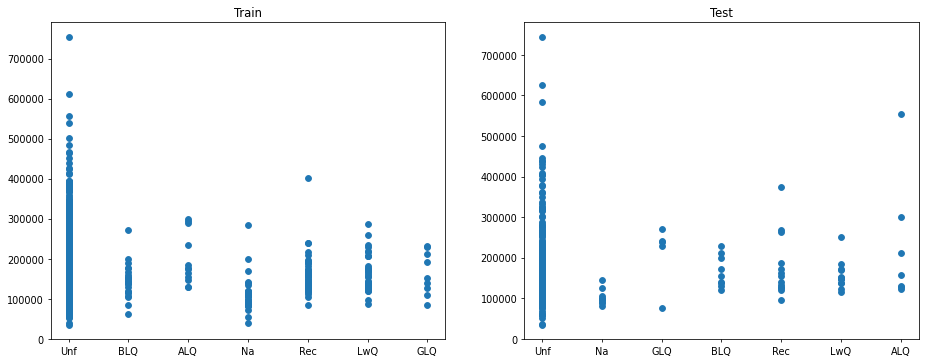

BsmtExposure


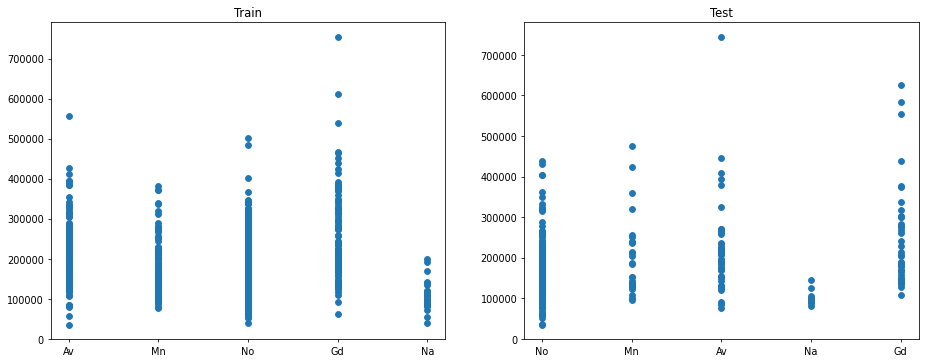

BsmtFinType1


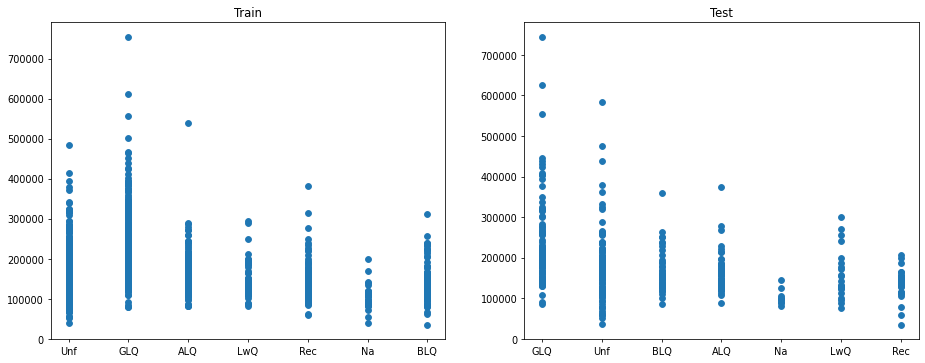

BsmtCond


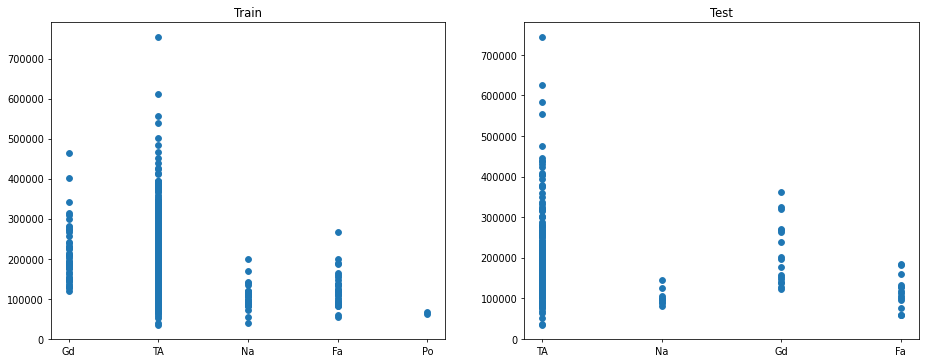

BsmtQual


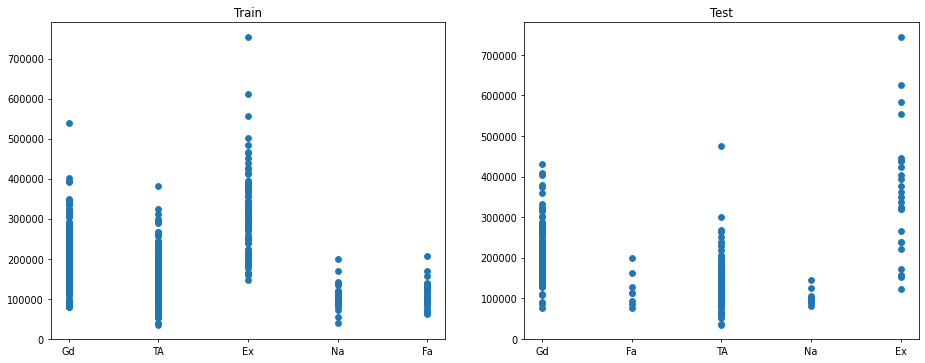

MasVnrArea


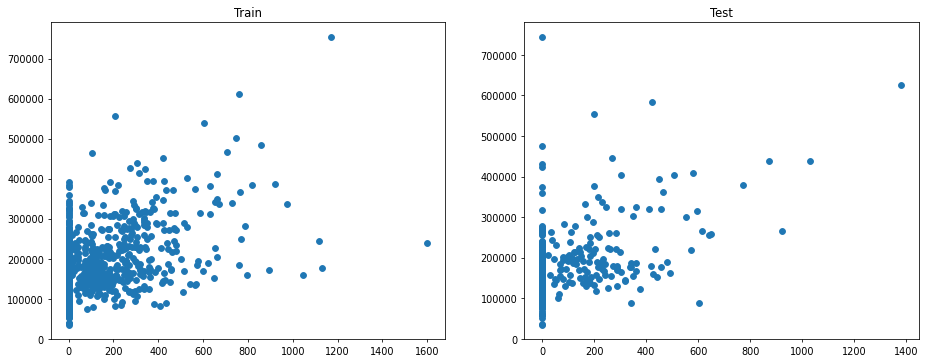

MasVnrType


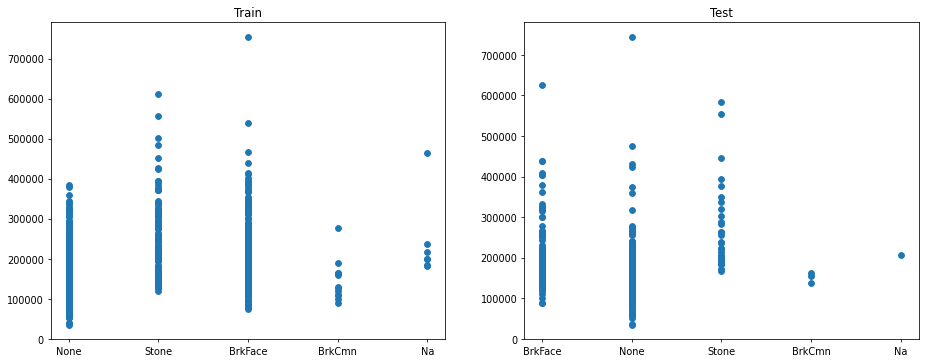

Electrical


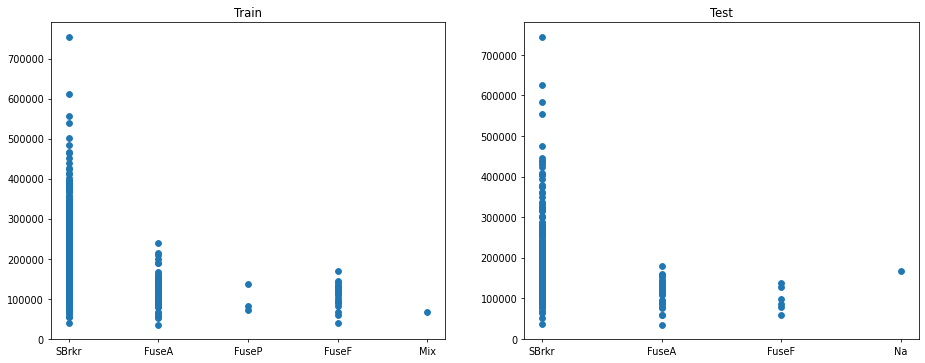

In [19]:
others = missing.index[:-6]
others = others[::-1]
for analysis_feature in others:
    print(analysis_feature)
    if analysis_feature in discrete:
        nan_analysis(analysis_feature)
    else:
        nan_analysis(analysis_feature, na = train[analysis_feature].mean())
        total[analysis_feature] = train[analysis_feature].fillna(train[analysis_feature].mean())

In [20]:
# GarageType
feature = 'GarageType'
mode = train[(train[feature] != 'BuiltIn') & (train[feature] != 'Attchd') & (train[feature] != 'Detchd')][feature].mode()[0]
total[feature] = total[feature].fillna(mode)

In [21]:
# GarageFinish
feature = 'GarageFinish'
total[feature] = total[feature].fillna('Na')

In [22]:
# GarageQual
feature = 'GarageQual'
mode = train[(train[feature] != 'TA')][feature].mode()[0]
total[feature] = total[feature].fillna(mode)

In [23]:
# GarageCond
feature = 'GarageCond'
mode = train[(train[feature] != 'TA')][feature].mode()[0]
total[feature] = total[feature].fillna(mode)

In [24]:
# BsmtFinType2
feature = 'BsmtFinType2'
mode = train[(train[feature] != 'Unf')][feature].mode()[0]
total[feature] = total[feature].fillna(mode)

In [25]:
# BsmtExposure
feature = 'BsmtExposure'
total[feature] = total[feature].fillna('Na')

In [26]:
# BsmtFinType1
feature = 'BsmtFinType1'
total[feature] = total[feature].fillna('Na')

In [27]:
# BsmtCond
feature = 'BsmtCond'
total[feature] = total[feature].fillna('Na')

In [28]:
# BsmtQual
feature = 'BsmtQual'
total[feature] = total[feature].fillna('Na')

In [29]:
# MasVnrType
feature = 'MasVnrType'
total[feature] = total[feature].fillna('BrkCmn')

In [30]:
# Electrical
feature = 'Electrical'
total[feature] = total[feature].fillna('FuseF')

In [31]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 364
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [32]:
total.to_csv('./data/total_fillna.csv', index = False)